## Check if the packages are installed and all function parameters

In [1]:
import importlib.util
import sys
import subprocess

def check_installation_and_install(package_name):
    spec = importlib.util.find_spec(package_name)
    if spec is None:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
    else:
        print(package_name + " is installed");

def save_cleaned_csv(dataframe,filename):
    os.makedirs("Cleaned_Data", exist_ok=True)  # Ensures directory exists
    dataframe.to_csv(f"Cleaned_Data/{filename}.csv")

check_installation_and_install("pandas")
check_installation_and_install("matplotlib")
check_installation_and_install("numpy")

pandas is installed
matplotlib is installed
numpy is installed


## Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Insert Dataset to clean and preprocess

In [3]:
file_directory = "../dataset"

office_1_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part1.csv"))
office_2_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part2.csv"))
small_apartment_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part3.csv"))
small_workshop_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part4.csv"))
kitchen_livingroom_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part5.csv"))
bed_room_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part6.csv"))
boiler_room_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part7.csv"))

df_array = [office_1_df,office_2_df,small_apartment_df,small_workshop_df,kitchen_livingroom_df,bed_room_df,boiler_room_df]

## Check Any Missing Value

In [4]:
def check_missing_value(df_array):
    for i, df in enumerate(df_array, start=1):
        print(f"DataFrame {i} Missing Values:")
        print(df.isnull().sum())
        print("-" * 30)

check_missing_value(df_array)

DataFrame 1 Missing Values:
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64
------------------------------
DataFrame 2 Missing Values:
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64
------------------------------
DataFrame 3 Missing Values:
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64
------------------------------
DataFrame 4 Missing Values:
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64
------------------------------
DataFrame 5 Missing Values:
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_A

## Check for any duplicated values|

In [5]:
def check_duplicated_values(df_array):
      for i, df in enumerate(df_array, start=1):
        duplicate = df[df.duplicated()]

        if not duplicate.empty:
            print("Duplicate Rows :")
            print(duplicate)
            print("-" * 30)
        else:
            print("No duplicate rows found")
            print("-" * 30)

check_duplicated_values(df_array)

No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------


## Clean Column 

In [6]:
#Remove Columns that is not useful
def clean_column(df_array, columns_to_drop):
    for i in range(len(df_array)):
        df_array[i] = df_array[i].drop(columns=columns_to_drop, axis=1)
    return df_array


clean_column(df_array,['CH','PREAM_LEN','BITRATE','PRFR'])
df_array

[      NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
 0      0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
 1      0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
 2      1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
 3      1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
 4      0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   
 ...    ...    ...     ...      ...      ...      ...          ...      ...   
 5995   0.0   3.23   745.0   7912.0  15358.0  10593.0         56.0  15155.0   
 5996   1.0   6.29   731.0   1100.0   1281.0    917.0         64.0   2457.0   
 5997   0.0   1.35   746.0  16329.0  18699.0  15969.0         76.0  12414.0   
 5998   1.0   6.24   750.0   8794.0  18983.0  14763.0         52.0  11404.0   
 5999   0.0   1.48   750.0   5285.0  19236.0  19242.0        100.0  14162.0   
 
       MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  C

## Check for Outliers

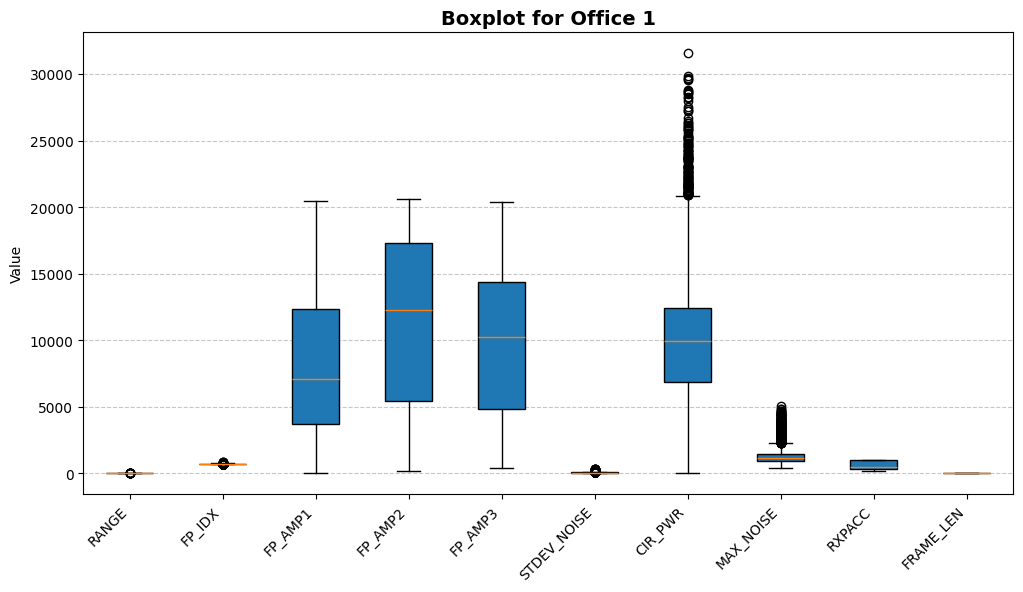

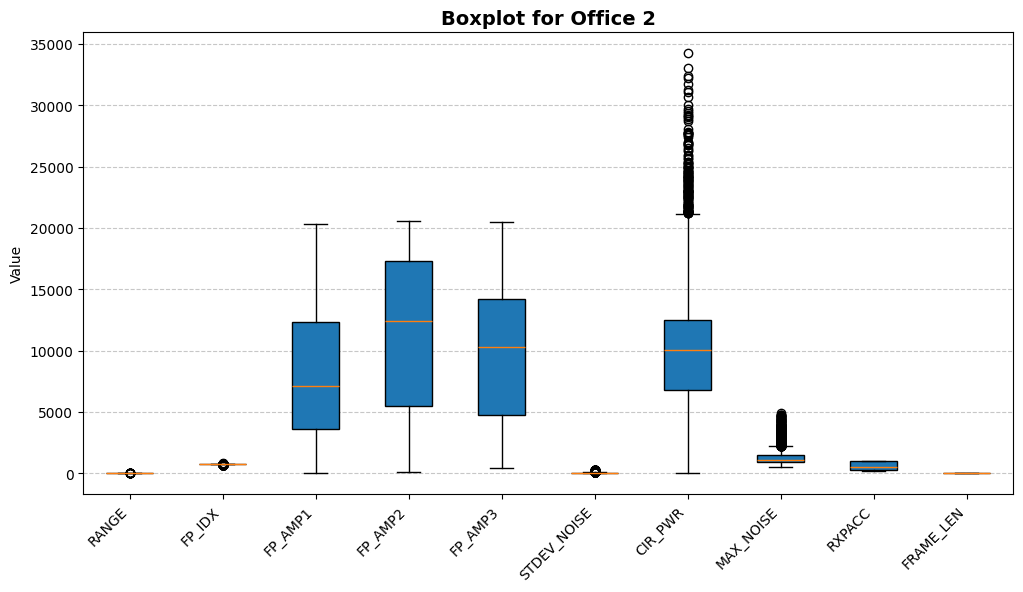

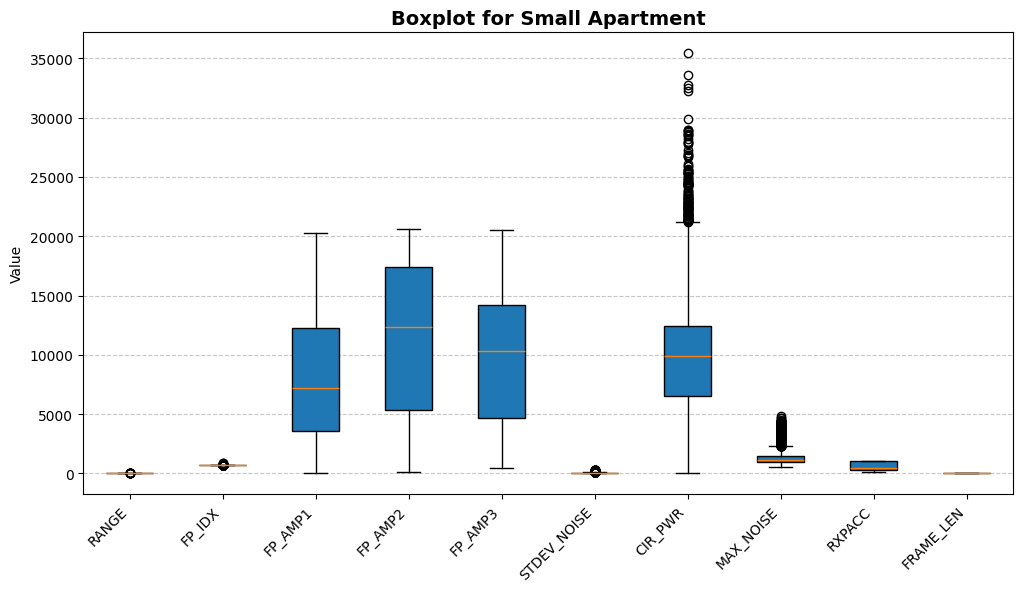

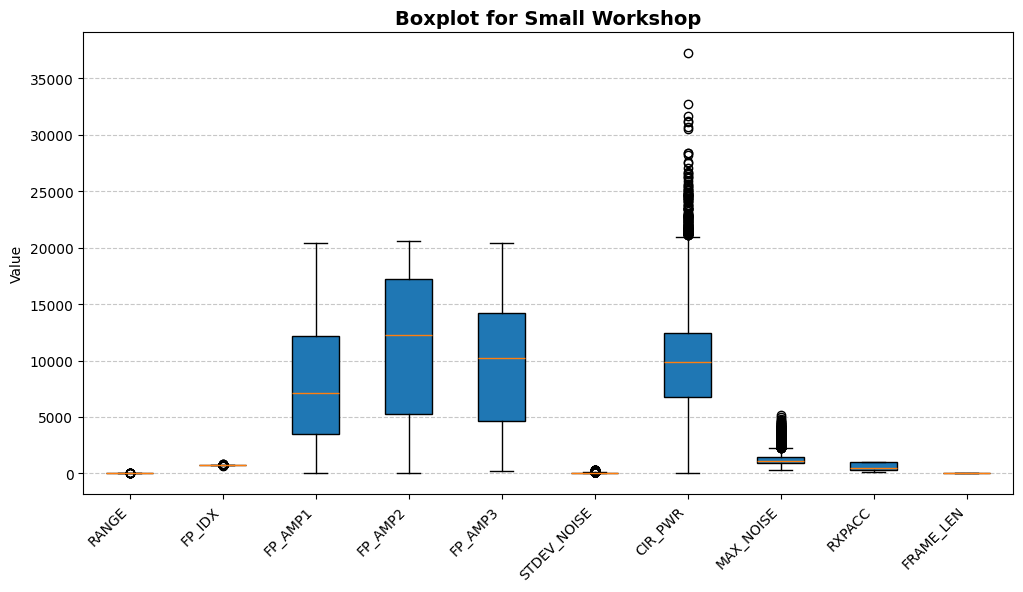

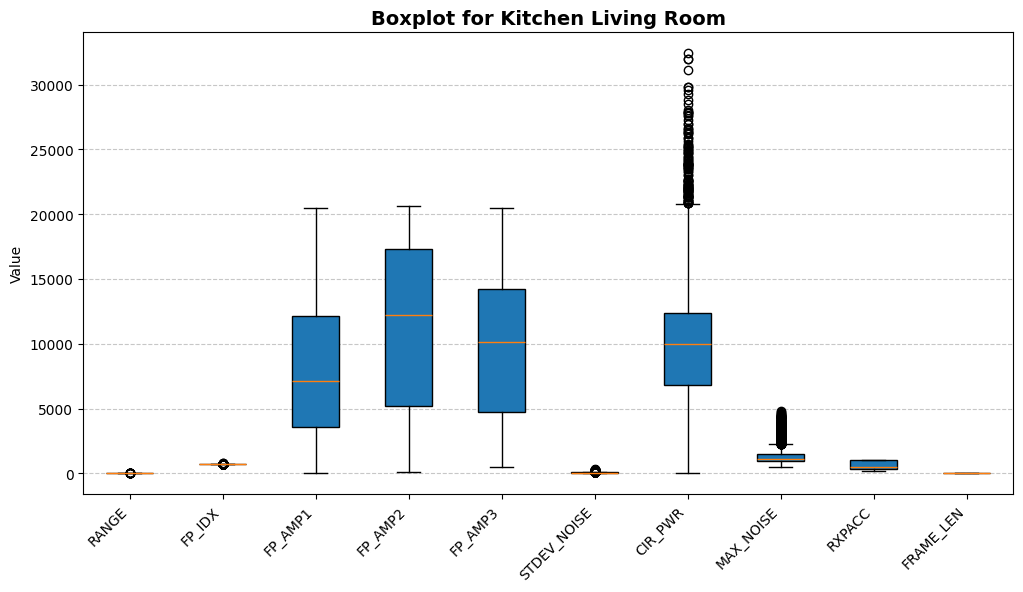

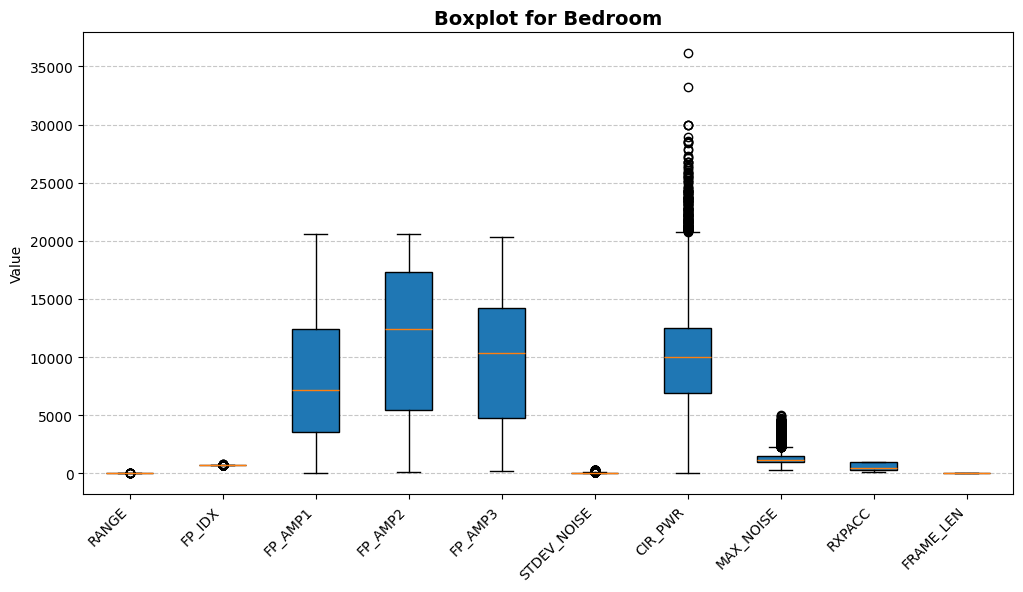

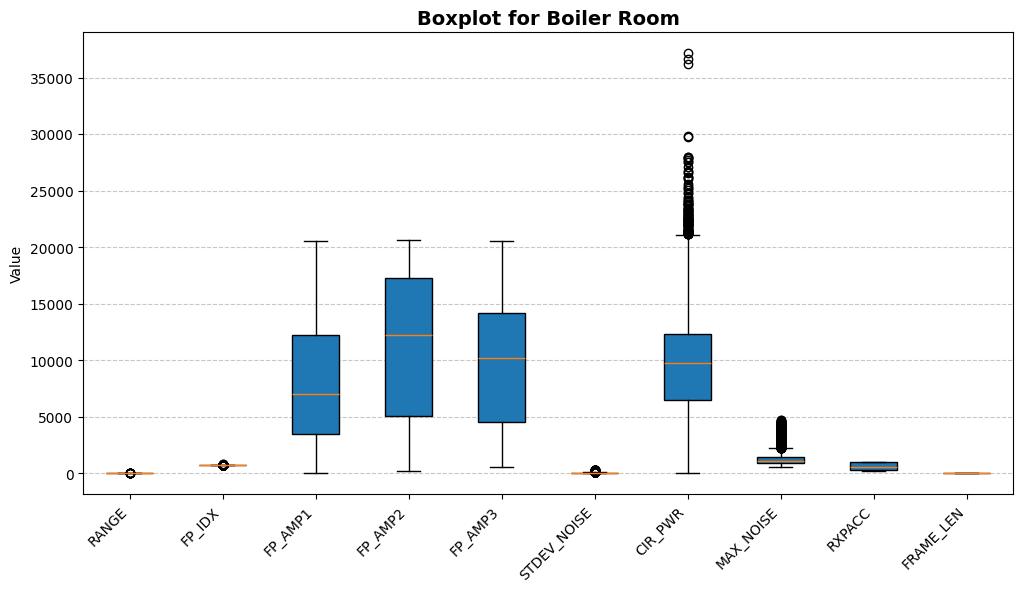

In [7]:
columns_to_check = [
    "RANGE", "FP_IDX", "FP_AMP1", "FP_AMP2", "FP_AMP3",
    "STDEV_NOISE", "CIR_PWR", "MAX_NOISE", "RXPACC",
    "FRAME_LEN"
]

dataset_names = [
    "Office 1", "Office 2", "Small Apartment", "Small Workshop",
    "Kitchen Living Room", "Bedroom", "Boiler Room"
]

for idx, df in enumerate(df_array): #Loop through each columns inside each df
    plt.figure(figsize=(12, 6)) #Create a 12x6 figure for the plot
    plt.boxplot(df[columns_to_check], vert=True, patch_artist=True) #Create a boxplot for columns 


    plt.xticks(range(1, len(columns_to_check) + 1), columns_to_check, rotation=45, ha="right") #Configuring x label
    plt.title(f"Boxplot for {dataset_names[idx]}", fontsize=14, fontweight="bold") #Add a title
    plt.ylabel("Value") #Add y label
    plt.grid(axis='y', linestyle='--', alpha=0.7) #Add grid to the plot

    plt.show()

## Remove Outliers

In [10]:
#Outliers are removed using Z Score
def calculate_mean(column):
    return sum(column) / len(column)

def calculate_std(column, mean):
    variance = sum((x - mean) ** 2 for x in column) / len(column) #Average Squared difference from the mean
    return variance ** 0.5 

def remove_outliers(df, columns, threshold=3):
    for col in columns:
        if col in df.columns:
            column_data = df[col].dropna().tolist() #Converting to list

            mean = calculate_mean(column_data) #Calculate mean for column
            std = calculate_std(column_data, mean) #Calculate STD for column

            z_scores = [(x - mean)/ std for x in column_data] #Compute ZScore

            #Filter rows where absolute Z score is less than threshold
            #Rows that has zScore greater or equal to threshold are removed as they will be considered outlier
            df = df[[abs((x - mean) / std) < threshold if not pd.isna(x) else False for x in df[col]]] 
            
    return df

df_array = [remove_outliers(df, columns_to_check) for df in df_array]

for idx, df in enumerate(df_array):
    print(f"{dataset_names[idx]}:")
    print(f" - Rows after outlier removal: {df.shape[0]}\n")

Office 1:
 - Rows after outlier removal: 5645

Office 2:
 - Rows after outlier removal: 5625

Small Apartment:
 - Rows after outlier removal: 5648

Small Workshop:
 - Rows after outlier removal: 5663

Kitchen Living Room:
 - Rows after outlier removal: 5627

Bedroom:
 - Rows after outlier removal: 5630

Boiler Room:
 - Rows after outlier removal: 5606

